In [18]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

In [22]:
confirmed_df = pd.read_csv("C:/Users/HTC/OneDrive/Desktop/COVID-19/covid19_Confirmed_dataset.csv")
deaths_df = pd.read_csv("C:/Users/HTC/OneDrive/Desktop/COVID-19/covid19_deaths_dataset.csv")
happiness_df = pd.read_csv("C:/Users/HTC/OneDrive/Desktop/COVID-19/worldwide_happiness_report.csv")

In [23]:
# Drop latitude, longitude, and province/state if present
confirmed_df = confirmed_df.drop(['Lat', 'Long', 'Province/State'], axis=1, errors='ignore')
deaths_df = deaths_df.drop(['Lat', 'Long', 'Province/State'], axis=1, errors='ignore')

# Group by Country/Region and sum cases
confirmed_grouped = confirmed_df.groupby('Country/Region').sum()
deaths_grouped = deaths_df.groupby('Country/Region').sum()

# Take last date's value (most recent cumulative total)
latest_confirmed = confirmed_grouped.iloc[:, -1].reset_index()
latest_deaths = deaths_grouped.iloc[:, -1].reset_index()

# Rename columns
latest_confirmed.columns = ['Country/Region', 'Confirmed']
latest_deaths.columns = ['Country/Region', 'Deaths']

# Merge both datasets
covid_df = pd.merge(latest_confirmed, latest_deaths, on='Country/Region')
covid_df.head()

,Country/Region,Confirmed,Deaths
0,Afghanistan,2171,64
1,Albania,773,31
2,Algeria,4006,450
3,Andorra,745,42
4,Angola,27,2


In [28]:
# Standardize country column
happiness_df.rename(columns={'Country name': 'Country/Region'}, inplace=True)

# Optional: Keep only needed columns
happiness_cleaned = happiness_df[['Country/Region', 'GDP per capita', 'Healthy life expectancy', 'Social support']]


In [29]:
merged_df = pd.merge(covid_df, happiness_cleaned, on='Country/Region', how='inner')
merged_df.head()


,Country/Region,Confirmed,Deaths,GDP per capita,Healthy life expectancy,Social support
0,Afghanistan,2171,64,0.350,0.361,0.517
1,Albania,773,31,0.947,0.874,0.848
2,Algeria,4006,450,1.002,0.785,1.160
3,Argentina,4428,218,1.092,0.881,1.432
4,Armenia,2066,32,0.850,0.815,1.055


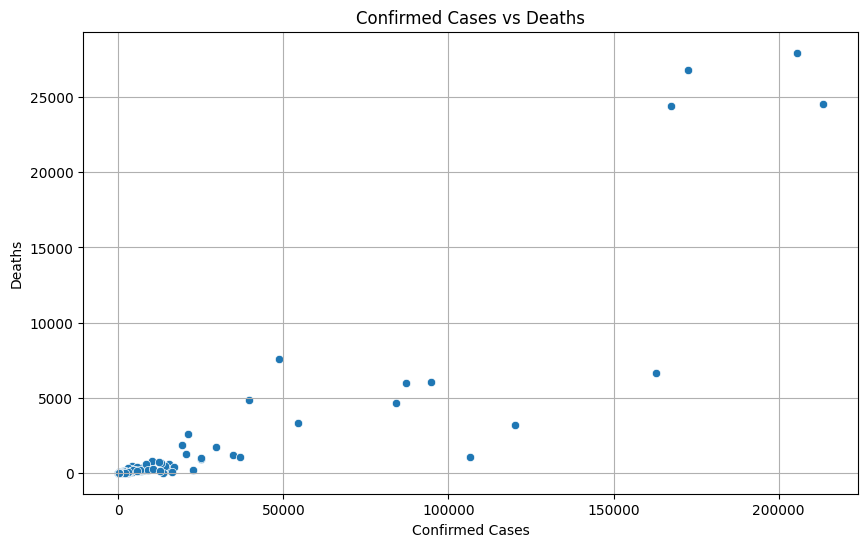

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x='Confirmed', y='Deaths')
plt.title('Confirmed Cases vs Deaths')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.grid(True)
plt.show()


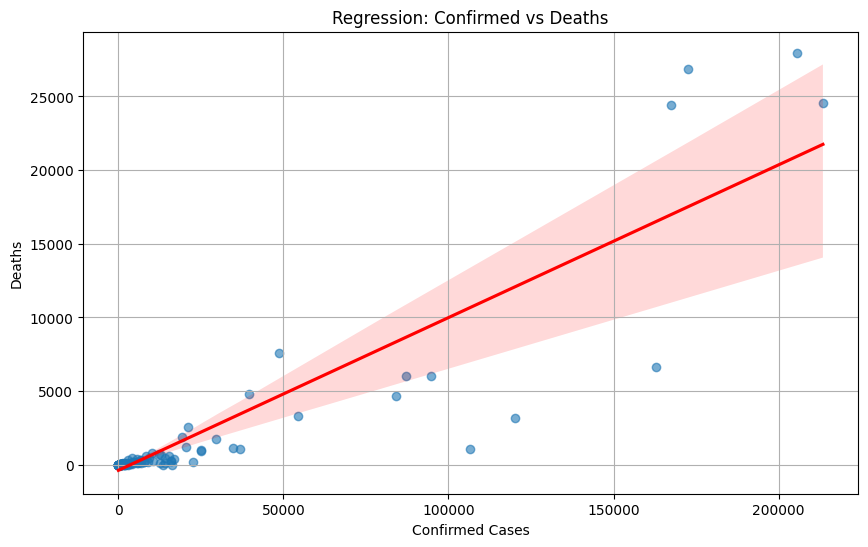

In [31]:
plt.figure(figsize=(10,6))
sns.regplot(data=merged_df, x='Confirmed', y='Deaths', scatter_kws={'alpha':0.6}, line_kws={"color": "red"})
plt.title('Regression: Confirmed vs Deaths')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.grid(True)
plt.show()

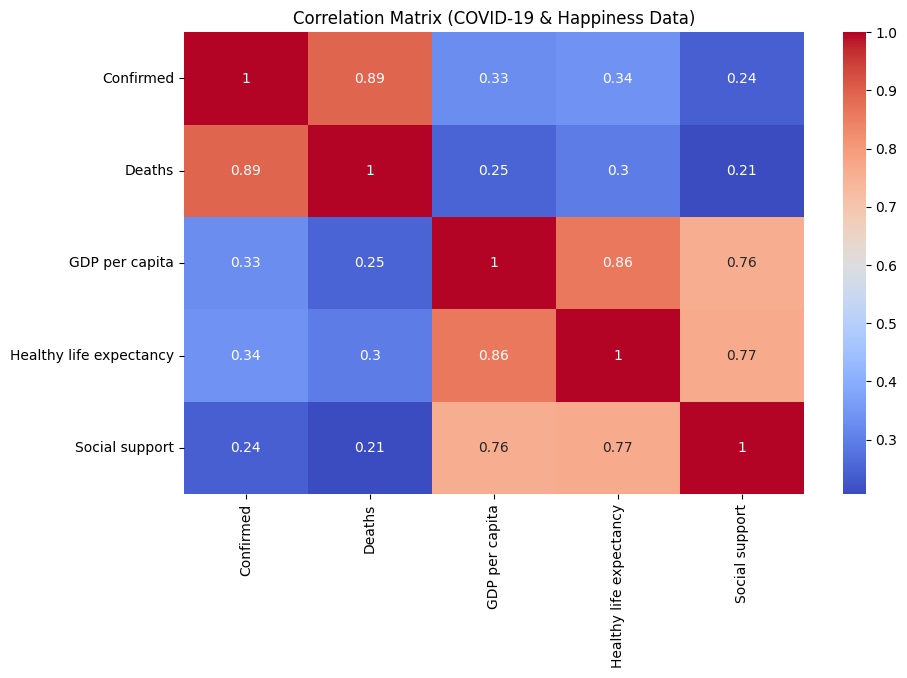

In [34]:
# Only select numeric columns for correlation matrix
numeric_df = merged_df.select_dtypes(include=[np.number])

# Plot correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (COVID-19 & Happiness Data)')
plt.show()
